# Stanford CME 241 (Winter 2026) - Assignment 2

**Due: Friday, February 13 @ 11:59 PM PST on Gradescope.**

Assignment instructions:
- Make sure each of the subquestions have answers
- Ensure that group members indicate which problems they're in charge of
- Show work and walk through your thought process where applicable
- Empty code blocks are for your use, so feel free to create more under each section as needed
- Document code with light comments (i.e. 'this function handles visualization')

Submission instructions:
- When complete, fill out your publicly available GitHub repo file URL and group members below, then export or print this .ipynb file to PDF and upload the PDF to Gradescope.

*Link to this ipynb file in your public GitHub repo (replace below URL with yours):*

https://github.com/my-username/my-repo/assignment-file-name.ipynb

*Group members (replace below names with people in your group):*
- Jackson Fang
- Xiao Huang
- Shunyu Yao

## Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1: Job-Hopping and Wages-Utility-Maximization (Led by Xiao Huang)

You are a worker who starts every day either employed or unemployed. If you start your day employed, you work on your job for the day (one of $n$ jobs, as elaborated later) and you get to earn the wage of the job for the day. However, at the end of the day, you could lose your job with probability $\alpha \in [0,1]$, in which case you start the next day unemployed. If at the end of the day, you do not lose your job (with probability $1-\alpha$), then you will start the next day with the same job (and hence, the same daily wage).

On the other hand, if you start your day unemployed, then you will be randomly offered one of $n$ jobs with daily wages $w_1, w_2, \ldots w_n \in \mathbb{R}^+$ with respective job-offer probabilities $p_1, p_2, \ldots p_n \in [0,1]$ (with $\sum_{i=1}^n p_i = 1$). You can choose to either accept or decline the offered job. If you accept the job offer, your day progresses exactly like the **employed-day** described above (earning the day's job wage and possibly (with probability $\alpha$) losing the job at the end of the day). However, if you decline the job offer, you spend the day unemployed, receive the unemployment wage $w_0 \in \mathbb{R}^+$ for the day, and start the next day unemployed.

The problem is to identify the optimal choice of accepting or rejecting any of the job offers the worker receives, in a manner that maximizes the infinite-horizon **Expected Discounted-Sum of Wages Utility**. Assume the daily discount factor for wages (employed or unemployed) is $\gamma \in [0,1])$. Assume Wages Utility function to be $U(w) = \log(w)$ for any wage amount $w \in \mathbb{R}^+$. The goal is to maximize:

$$
\mathbb{E}\left[\sum_{u=t}^\infty \gamma^{u-t} \cdot \log(w_{i_u})\right]
$$

at the start of a given day $t$ ($w_{i_u}$ is the wage earned on day $u$, $0 \leq i_u \leq n$ for all $u \geq t$).

---

### Subquestions

#### Part (A): MDP Modeling

Express the job-hopping problem as an MDP using clear mathematical notation by defining the following components:

1. **State Space**: Define the possible states of the MDP.
2. **Action Space**: Specify the actions available to the worker at each state.
3. **Transition Function**: Describe the probabilities of transitioning between states for each action.
4. **Reward Function**: Specify the reward associated with the states and transitions.
5. **Bellman Optimality Equation**: Write the Bellman Optimality Equation customized for this MDP.

---

#### Part (B): Python Implementation

Write Python code that:

1. Solves the Bellman Optimality Equation (hence, solves for the **Optimal Value Function** and the **Optimal Policy**) with a numerical iterative algorithm.
2. Clearly define the inputs and outputs of your algorithm with their types (`int`, `float`, `List`, `Mapping`, etc.).

*Note*: For this problem, write the algorithm from scratch without using any prebuilt MDP/DP libraries or code.

---

#### Part (C): Visualization and Analysis

1. Plot the **Optimal Value Function** as a function of the state for a specific set of parameters ($n$, $w_1, \ldots, w_n$, $p_1, \ldots, p_n$, $\alpha$, $\gamma$, $w_0$).
2. Include these graphs in your submission.

---

#### Part (D): Observations

1. What patterns do you observe in the **Optimal Policy** as you vary the parameters $n$, $\alpha$, and $\gamma$?
2. Provide a brief discussion of your findings.

---

### Part (A) Answer

<span style="color:red">*
In this question, we define two status: employed and unemployed as with respected of the finite time horizon $i\in\{1,...,n\}$, then the employment status will be either employed $E_i$ and unemployed $N_i$.

1. State space:
- Therefore the state space will be $S=\{E_1,\dots,E_n\}\cup\{N_1,\dots,N_n\}$.

in this question, we need to choose accept or reject the offer in unemployed states.

2. Action space: if employed:

- At employed states: $A(E_i) = \{work\}$     

in this question, we need to choose accept or reject the offer in unemployed states.

- At unemployed but with offer states: $A(N_i) = \{accept, reject\}$.

3. Transition function:
- if employed:
  - $P(E_i | E_i, work) = 1 - \alpha$
  - $P(N_j | E_i, work) = \alpha * p_j, ∀ j = 1, ..., n$

  - 0, o/w
- if accept offer at unemployed state:
  - $P(E_i | N_i, accept) = 1 - \alpha$
  - $P(N_j | N_i, accept) = \alpha * p_j, ∀ j = 1, ..., n$
  - 0, o/w

- From unemployed state O_i, if reject:
  - $P(N_j | N_i, reject) = p_j, ∀ j = 1, ..., n$
  - 0, o/w

4. Reward function:
- $R(E_i, work)    = log(w_i)$
- $R(N_i, accept)  = log(w_i)$
- $R(N_i, reject)  = log(w_0)$

5. Bellman Optimality Equation:
- For each employed state:
  - $V^*(E_i) = log(w_i)+ \gamma [ (1 - \alpha) V*(E_i) + \alpha \sum_{j=1}^n p_j V*(N_j) ]$.


- For each umployed but offered state
  - $ V^*(N_i) = \max\{log(w_i)+ \gamma [(1 - \alpha) V^*(E_i) + \alpha \sum_{j=1}^n p_j V^*(N_j)],
  log(w_0)+ \gamma \sum_{j=1}^n p_j V^*(N_j) \}$.

  if we simpify this with the employed state,
  
  - $V^*(N_i) = max\{V^*(E_i), log(w_0) + \gamma \sum_j p_jV^*(N_j)\}$









*</span>

### Part (B) Answer

In [ ]:
# fill in with Python code

from math import log
from typing import List, Tuple


def solve_job_hopping(
    n: int,
    wages: List[float],
    probs: List[float],
    alpha: float,
    gamma: float,
    w0: float,
    tol: float = 1e-10, #adjustable
    max_iter: int = 100,#adjustable
) -> Tuple[List[List[float]], List[int]]:


    # v_e[i] = V(E_i), v_n[i] = V(N_i)
    v_e = [0.0] * n
    v_n = [0.0] * n


    for _ in range(max_iter):
        exp_vn = sum(probs[j] * v_n[j] for j in range(n))  # sum_j p_j V(N_j)

        next_v_e = [0.0] * n
        next_v_n = [0.0] * n

        for i in range(n):
            accept_val = log(wages[i]) + gamma * (
                (1.0 - alpha) * v_e[i] + alpha * exp_vn
            )
            reject_val = log(w0) + gamma * exp_vn

            next_v_e[i] = accept_val
            next_v_n[i] = accept_val if accept_val >= reject_val else reject_val

        residual_e = max(abs(next_v_e[i] - v_e[i]) for i in range(n))
        residual_n = max(abs(next_v_n[i] - v_n[i]) for i in range(n))
        residual = max(residual_e, residual_n)

        v_e, v_n = next_v_e, next_v_n
        if residual < tol:
            break

    exp_vn = sum(probs[j] * v_n[j] for j in range(n))
    pi_star = [0] * n
    for i in range(n):
        q_accept = log(wages[i]) + gamma * ((1.0 - alpha) * v_e[i] + alpha * exp_vn)
        q_reject = log(w0) + gamma * exp_vn
        pi_star[i] = 1 if q_accept >= q_reject else 0

    v_star = [v_e, v_n]
    return v_star, pi_star



### Part (C) Answer
- I pick $w_{min}=10,w_{max}=100,\alpha=0.10,\gamma=0.95,w_0=20.0$ for the plot
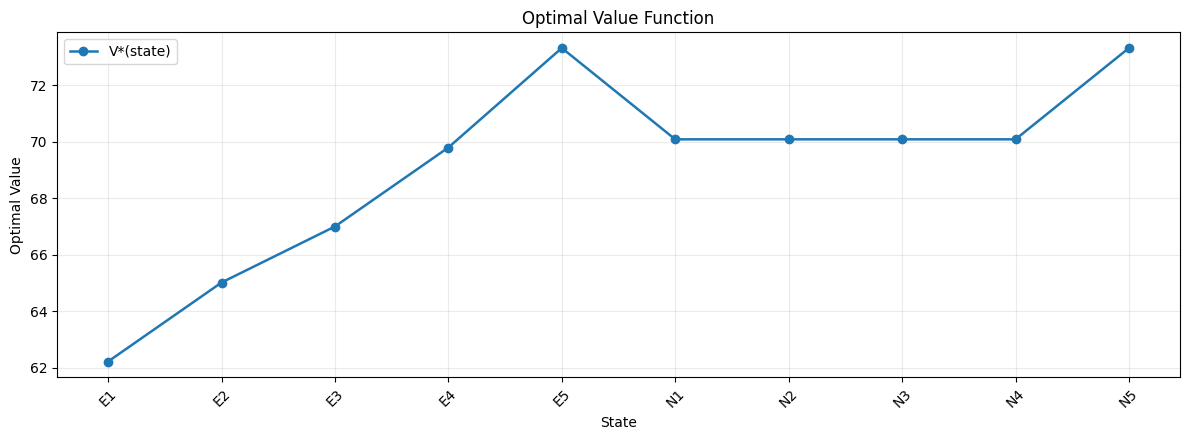
<span style="color:red">

</span>

### Part (D) Answer

<span style="color:red">
I plotted the optimal action wrt offered wage to show the optimal policy sensitivity to the change in parameters.

1. varying $α$
- When α gets larger, the probability of losing the job gets higher. When $\alpha$ gets larger, then the job is more temporary, and there is less incentive to wait for a perfect job, and the optimal action will sadenlly jump to accept the offer with lower wages. And as α gets lower, the job will be more stable, then the optimal action will be rejecting the offer, and there is an incentive to wait longer until finding a good job.
2. varying γ
- a higher $\gamma$ means caring more about the future. When gamma increase, more patience will be seen, and will accept the offer with longer wait than lower γ

3. varying n
- when n gets larger, there are more jobs. When n gets larger, the accepted wage seems converge to a fix point, and the accepted  wage will be lower
But also whether increase in n affects the chance of seeing high-wage jobs are important (i.e how does $p_i$ changes). if increasing n adds more high-wage jobs, then the optimal oplicy will be more selective.



</span>

## Question 2: Two-Stores Inventory Control (Led by __Jackson____)

We extend the capacity-constrained inventory example implemented in [rl/chapter3/simple_inventory_mdp_cap.py](https://github.com/TikhonJelvis/RL-book/blob/master/rl/chapter3/simple_inventory_mdp_cap.py) as a `FiniteMarkovDecisionProcess` (the Finite MDP model for the capacity-constrained inventory example is described in detail in Chapters 1 and 2 of the RLForFinanceBook). Here we assume that we have two different stores, each with their own separate capacities $C_1$ and $C_2$, their own separate Poisson probability distributions of demand (with means $\lambda_1$ and $\lambda_2$), their own separate holding costs $h_1$ and $h_2$, and their own separate stockout costs $p_1$ and $p_2$. At 6pm upon stores closing each evening, each store can choose to order inventory from a common supplier (as usual, ordered inventory will arrive at the store 36 hours later). We are also allowed to transfer inventory from one store to another, and any such transfer happens overnight, i.e., will arrive by 6am next morning (since the stores are fairly close to each other). Note that the orders are constrained such that following the orders on each evening, each store's inventory position (sum of on-hand inventory and on-order inventory) cannot exceed the store's capacity (this means the action space is constrained to be finite). Each order made to the supplier incurs a fixed transportation cost of $K_1$ (fixed-cost means the cost is the same no matter how many units of non-zero inventory a particular store orders). Moving any non-zero inventory between the two stores incurs a fixed transportation cost of $K_2$.

Model this as a derived class of `FiniteMarkovDecisionProcess` much like we did for `SimpleInventoryMDPCap` in the code repo. Set up instances of this derived class for different choices of the problem parameters (capacities, costs etc.), and determine the Optimal Value Function and Optimal Policy by invoking the function `value_iteration` (or `policy_iteration`) from file [rl/dynamic_programming.py](https://github.com/TikhonJelvis/RL-book/blob/master/rl/dynamic_programming.py).

Analyze the obtained Optimal Policy and verify that it makes intuitive sense as a function of the problem parameters.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir('/content/gdrive/My Drive/RL-book')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
print(os.getcwd())

/content/gdrive/My Drive/RL-book


In [ ]:
# fill in with Python code
from dataclasses import dataclass
from typing import Tuple, Dict, Mapping, NamedTuple
from rl.markov_decision_process import FiniteMarkovDecisionProcess
from rl.policy import FiniteDeterministicPolicy
from rl.markov_process import FiniteMarkovProcess, FiniteMarkovRewardProcess
from rl.distribution import Categorical
from scipy.stats import poisson
import itertools


@dataclass(frozen=True)
class TwoStoreState:
    on_hand_1: int
    on_hand_2: int
    on_order_1: int
    on_order_2: int

    def inventory_position_1(self) -> int:
        return self.on_hand_1 + self.on_order_1

    def inventory_position_2(self) -> int:
        return self.on_hand_2 + self.on_order_2

class TwoStoreAction(NamedTuple):
    order_1: int
    order_2: int
    transfer: int


TwoStoreMapping = Mapping[
    TwoStoreState,
    Mapping[TwoStoreAction, Categorical[Tuple[TwoStoreState, float]]]
]


class TwoStoreInventoryMDP(FiniteMarkovDecisionProcess[TwoStoreState, TwoStoreAction]):

    def __init__(
        self,
        c1: int, c2: int,
        l1: float, l2: float,
        h1: float, h2: float,
        p1: float, p2: float,
        k1: float, k2: float
    ):
        self.c1 = c1
        self.c2 = c2
        self.l1 = l1
        self.l2 = l2
        self.h1 = h1
        self.h2 = h2
        self.p1 = p1
        self.p2 = p2
        self.k1 = k1
        self.k2 = k2

        self.dist1 = poisson(l1)
        self.dist2 = poisson(l2)

        super().__init__(self.get_action_transition_reward_map())

    def get_action_transition_reward_map(self) -> TwoStoreMapping:
        d = {}

        # all possible states
        states = [
            TwoStoreState(oh1, oh2, oo1, oo2)
            for oh1 in range(self.c1 + 1)
            for oo1 in range(self.c1 + 1 - oh1)
            for oh2 in range(self.c2 + 1)
            for oo2 in range(self.c2 + 1 - oh2)
        ]

        for state in states:
            d1 = {}
            ip1 = state.inventory_position_1()
            ip2 = state.inventory_position_2()

            # create all possible actions
            min_transfer = -state.on_hand_2
            max_transfer = state.on_hand_1

            for t in range(min_transfer, max_transfer + 1):
                # IP = (On Hand - Transfer) + On Order + New Order

                max_o1 = self.c1 - (ip1 - t)
                max_o2 = self.c2 - (ip2 + t)

                if max_o1 < 0 or max_o2 < 0:
                    continue

                for o1 in range(max_o1 + 1):
                    for o2 in range(max_o2 + 1):
                        action = TwoStoreAction(o1, o2, t)

                        # calculate cost and rewards

                        # fixed Costs
                        fixed_cost = 0.0
                        if o1 > 0: fixed_cost += self.k1
                        if o2 > 0: fixed_cost += self.k1
                        if t != 0: fixed_cost += self.k2

                        # holding cost

                        eff_oh1 = state.on_hand_1 - t
                        eff_oh2 = state.on_hand_2 + t
                        holding_cost = (self.h1 * eff_oh1) + (self.h2 * eff_oh2)

                        base_reward = -(fixed_cost + holding_cost)

                        # effective  ip available to meet demand
                        # on-order arrives now
                        avail_1 = eff_oh1 + state.on_order_1
                        avail_2 = eff_oh2 + state.on_order_2

                        outcomes = {}

                        # Loop over demand scenarios for Store 1
                        # We go up to avail_1 (demand met) and treat avail_1+1 as "stockout" bucket
                        for d1_val in range(avail_1 + 1):
                            if d1_val < avail_1:
                                p1 = self.dist1.pmf(d1_val)
                                next_oh1 = avail_1 - d1_val
                                cost1 = 0.0
                            else:
                                # tail probability for stockout
                                prob_le = self.dist1.cdf(avail_1 - 1) if avail_1 > 0 else 0.0
                                p1 = 1.0 - prob_le
                                next_oh1 = 0
                                # expected stockout quantity, expected demand(total) - expected sales
                                expected_shortage_1 = self.l1 - avail_1 * (1 - self.dist1.pmf(avail_1)/p1)
                                cost1 = self.p1 * expected_shortage_1

                            # store 2
                            for d2_val in range(avail_2 + 1):
                                if d2_val < avail_2:
                                    p2 = self.dist2.pmf(d2_val)
                                    next_oh2 = avail_2 - d2_val
                                    cost2 = 0.0
                                else:
                                    prob_le = self.dist2.cdf(avail_2 - 1) if avail_2 > 0 else 0.0
                                    p2 = 1.0 - prob_le
                                    next_oh2 = 0
                                    expected_shortage_2 = self.l2 - avail_2 * (1 - self.dist2.pmf(avail_2)/p2)
                                    cost2 = self.p2 * expected_shortage_2

                                # Combine into Joint Outcome
                                joint_prob = p1 * p2
                                total_reward = base_reward - (cost1 + cost2)
                                next_state = TwoStoreState(next_oh1, next_oh2, o1, o2)

                                # Add to probability mass
                                pair = (next_state, total_reward)
                                outcomes[pair] = outcomes.get(pair, 0.0) + joint_prob

                        d1[action] = Categorical(outcomes)

            d[state] = d1

        return d

if __name__ == '__main__':
    from pprint import pprint
    from rl.dynamic_programming import value_iteration_result
    from rl.dynamic_programming import evaluate_mrp_result, policy_iteration_result, value_iteration_result
    from rl.markov_process import FiniteMarkovProcess
    from rl.policy import FiniteDeterministicPolicy
    from pprint import pprint

    # config
    user_gamma = 0.9

    two_store_mdp = TwoStoreInventoryMDP(
        c1=2, c2=2, l1=0.5, l2=0.5, h1=1.0, h2=1.0, p1=10.0, p2=10.0, k1=2.0, k2=0.5
    )


    # policy iteration results
    print("\nMDP Policy Iteration: Optimal Value and Policy")
    print("----------------------------------------------")
    opt_vf_pi, opt_policy_pi = policy_iteration_result(two_store_mdp, gamma=user_gamma)
    pprint(opt_vf_pi)
    print(opt_policy_pi)

    # value iteration results
    print("\nMDP Value Iteration: Optimal Value and Policy")
    print("---------------------------------------------")
    opt_vf_vi, opt_policy_vi = value_iteration_result(two_store_mdp, gamma=user_gamma)
    pprint(opt_vf_vi)
    print(opt_policy_vi)


MDP Policy Iteration: Optimal Value and Policy
----------------------------------------------
{NonTerminal(state=TwoStoreState(on_hand_1=2, on_hand_2=2, on_order_1=0, on_order_2=0)): np.float64(-51.46783754873693),
 NonTerminal(state=TwoStoreState(on_hand_1=2, on_hand_2=1, on_order_1=0, on_order_2=1)): np.float64(-50.46783754873693),
 NonTerminal(state=TwoStoreState(on_hand_1=2, on_hand_2=1, on_order_1=0, on_order_2=0)): np.float64(-52.25989322867612),
 NonTerminal(state=TwoStoreState(on_hand_1=2, on_hand_2=0, on_order_1=0, on_order_2=2)): np.float64(-49.46783754873693),
 NonTerminal(state=TwoStoreState(on_hand_1=2, on_hand_2=0, on_order_1=0, on_order_2=1)): np.float64(-51.25989322867612),
 NonTerminal(state=TwoStoreState(on_hand_1=1, on_hand_2=0, on_order_1=1, on_order_2=1)): np.float64(-50.25989322867612),
 NonTerminal(state=TwoStoreState(on_hand_1=1, on_hand_2=0, on_order_1=1, on_order_2=0)): np.float64(-52.61489012686437),
 NonTerminal(state=TwoStoreState(on_hand_1=1, on_hand_2=2,

The optimal value function and optimal policy makes intuitive sense.
1. Balancing the transfer and order from suppliers. When the state is (0, 2, 0, 0), where store 1 is empty but store 2 is full—the policy chooses to transfer from store 2 to store 1 a 1 stock. Since a transfer arrives in 12 hours while a supplier order takes 36 hours, the model pays the lower $K_2$ cost to provide immediate relief to store 1, significantly reducing the high expected shortage penalty.

2. In state (0, 0, 0, 0), the policy chooses to order 2 for both stores.Since ecause there is a fixed cost $K_1$ (2.0) per order, it is inefficient to place small, frequent orders. When inventory is depleted, the model fill it to the maximum to avoid frequent fixed cost.

3. Another example is in optimal value function,

    For State TwoStoreState(on_hand_1=1, on_hand_2=0, on_order_1=1, on_order_2=0): Do Action TwoStoreAction(order_1=0, order_2=1, transfer=1).

    Since there is already order to fill the c1, and there is nothing in c2 yet, having c1 transfer 1 unit to c2 can avoid large stockout cost, while ordering 1 more unit for c2 would not exceed the maximun.

## Question 3: Dynamic Price Optimization (Led by Xiao Huang)

You own a supermarket, and you are $T$ days away from Halloween 🎃. You have just received $M$ Halloween masks from your supplier. You want to dynamically set the selling price of the Halloween masks at the start of each day in a manner that maximizes your **Expected Total Sales Revenue** for Halloween masks this season (assume no one will buy Halloween masks after Halloween).

Assume that for each of the $T$ days, you are required to select a price for that day from one of $N$ prices $p_1, p_2, \dots, p_N \in \mathbb{R}$, and that price is the selling price for all masks on that day. Assume that the customer demand for the number of Halloween masks on any day is governed by a Poisson probability distribution with mean $\lambda_i \in \mathbb{R}$ if you select that day’s price to be $p_i$ (where $i$ is a choice among $1, 2, \dots, N$).

Note that on any given day, the demand could exceed the number of Halloween masks you have in the store, in which case the number of masks sold on that day will be equal to the number of Halloween masks you had at the start of that day.

We spoke about this example in class - referencing the slides here (if needed) could be helpful!

---

### Subquestions

#### Part (A): Bellman Optimality Equation

Write the **Bellman Optimality Equation** customized to this Markov Decision Process (MDP). Essentially, you need to express the **Optimal Value Function** $v_*$ recursively based on taking the best action in the current state and based on the subsequent random customer demand that would produce the appropriate reward and take you to the next state.

**Note**: The probability mass function of a Poisson distribution with mean $\lambda \in \mathbb{R}$ is given by:

$$
f(k) = \frac{e^{-\lambda} \lambda^k}{k!}, \quad k = 0, 1, 2, \dots
$$

---

#### Part (B): Boundary Conditions

To be able to solve the $v_*$ recursion, you need to know the values of $v_*$ for the boundary case (boundary states). Write down the boundary case(s) for the $v_*$ recursion.

---

#### Part (C): Numerical Solution

You can solve this $v_*$ recursion (hence, solve for the **Optimal Policy** $\pi_*$) with a numerical recursive algorithm (essentially a special form of Dynamic Programming algorithm customized to this problem).

Write Python code for this algorithm that would enable you to dynamically set the selling price at the start of each day. Clearly define the inputs and outputs of your algorithm with their types (`int`, `float`, `List`, `Mapping`, etc.).

---


### Part (A) Answer

<span style="color:red">
1. We denote the inventory at t starts at I, and the demand $d~Poisson(λ_i)$, and the amount sold at the day is $ min(I_t, d)$

- when t = 0,  then $I_0 = M$

Therefore, $I_{t+1} = I_t-min(I_t, d_t)$


- when $0\leq t<T$

  - $V^{*}(t, I_t)=\max_{1 \le i \le N}\sum_{d=0}^{\infty}\frac{e^{-\lambda_i}\lambda_i^{d}}{d!}\Bigl(p_i \min(I_t,d) + V^*\bigl(t+1,\; I_t-\min(I_t,d)\bigr)
\Bigr)$





</span>

### Part (B) Answer

<span style="color:red">
the boundary condition is
$V^*(t, I) = 0, \forall I$



</span>

### Part (C) Answer

In [12]:
# fill in with Python
from math import exp, factorial
from typing import List, Tuple


def poisson_pmf(k: int, lam: float) -> float:
    return exp(-lam) * (lam ** k) / factorial(k)


def solve_dynamic_pricing(
    T: int,
    M: int,
    prices: List[float],
    lambdas: List[float],) -> Tuple[List[List[float]], List[List[int]]]:

    N = len(prices)

    V: List[List[float]] = [[0.0] * (M + 1) for _ in range(T + 1)]
    policy: List[List[int]] = [[0] * (M + 1) for _ in range(T)]
    K_MAX = M + 20


    pmf_table: List[List[float]] = []
    for i in range(N):
        row = [poisson_pmf(k, lambdas[i]) for k in range(K_MAX + 1)]
        pmf_table.append(row)


    for t in range(T - 1, -1, -1):
        for inv in range(1, M + 1):
            best_val = -1e18
            best_action = 0

            for i in range(N):

                q_val = 0.0
                for k in range(min(inv, K_MAX + 1)):
                    revenue_today = prices[i] * k
                    future_inv = inv - k
                    q_val += pmf_table[i][k] * (revenue_today + V[t + 1][future_inv])
                tail_prob = 1.0 - sum(pmf_table[i][k] for k in range(min(inv, K_MAX + 1)))
                revenue_sellout = prices[i] * inv

                q_val += tail_prob * revenue_sellout

                if q_val > best_val:
                    best_val = q_val
                    best_action = i

            V[t][inv] = best_val
            policy[t][inv] = best_action

    return V, policy


if __name__ == "__main__":
    T = 10
    M = 30
    prices = [5.0, 8.0, 10.0, 12.0, 15.0]
    lambdas = [8.0, 5.0, 3.5, 2.5, 1.5]

    V, policy = solve_dynamic_pricing(T=T, M=M, prices=prices, lambdas=lambdas)
    for t in range(T):
        inv = M
        idx = policy[t][inv]
        print(f"{t} | {inv} | {idx} | {prices[idx]}")

0 | 30 | 3 | 12.0
1 | 30 | 2 | 10.0
2 | 30 | 2 | 10.0
3 | 30 | 2 | 10.0
4 | 30 | 1 | 8.0
5 | 30 | 1 | 8.0
6 | 30 | 1 | 8.0
7 | 30 | 1 | 8.0
8 | 30 | 1 | 8.0
9 | 30 | 1 | 8.0


## Question 4: Risk-Aversion and Utility Optimization under CARA Utility (Led by Shunyu Yao)

You are tasked with analyzing the behavior of an investor who seeks to maximize their utility under **CARA Utility**. The investor has wealth $W$ and the CARA utility function:

$$
U(W) = \frac{1 - e^{-aW}}{a}, \quad a > 0,
$$

where $a$ represents the investor's **risk aversion**.

The investor allocates their wealth between:
1. A **riskless asset** with a fixed return $r$, and
2. A **risky asset** with return $R \sim \mathcal{N}(\mu, \sigma^2)$

The investor allocates a fraction $\pi$ of their wealth to the risky asset and $(1 - \pi)$ to the riskless asset. The wealth $W$ after one year is given by:

$$
W = (1 + r)(1 - \pi) + (1 + R)\pi.
$$

The goal is to analyze the investor’s optimal allocation $\pi$ to the risky asset and compute key risk-related quantities.

---

### Subquestions

#### Part (A): Expected Utility and Certainty-Equivalent Wealth

1. Derive the expression for the **expected utility** $\mathbb{E}[U(W)]$, using the given CARA utility function and assuming $R \sim \mathcal{N}(\mu, \sigma^2)$.
2. Using a Taylor expansion, approximate the **certainty-equivalent wealth** $W_{CE}$ up to second-order terms.

---

#### Part (B): Optimal Portfolio Allocation

Derive the optimal fraction $\pi^*$ of wealth to be allocated to the risky asset such that the **expected utility** $\mathbb{E}[U(W)]$ is maximized. Express $\pi^*$ in terms of $a$, $\mu$, $r$, and $\sigma^2$.

---

#### Part (C): Risk Premium

1. Using the results from Part (A), calculate the **absolute risk premium** $\pi_A = \mathbb{E}[W] - W_{CE}$.
2. Verify that $\pi_A \approx \frac{a \pi^2 \sigma^2}{2}$ for small $\sigma^2$.

---

#### Part (D): Numerical Calculations and Interpretation

Given the parameters $r = 0.02$, $\mu = 0.08$, $\sigma^2 = 0.04$, and $a = 3$:
1. Compute the optimal allocation $\pi^*$.
2. Calculate the certainty-equivalent wealth $W_{CE}$.
3. Compute the absolute risk premium $\pi_A$.
4. Interpret the results and discuss how changes in $a$ and $\sigma^2$ affect the risk premium and portfolio allocation.

---

#### Part (E): Expected Utility under Uniform Distribution

Now assume that the return of the risky asset, $R$, is no longer normally distributed. Instead, $R \sim \text{Uniform}[\alpha, \beta]$, where $\alpha$ and $\beta$ are the lower and upper bounds of the distribution, respectively.

1. Derive the new expression for the **expected utility** $\mathbb{E}[U(W)]$. Make sure to simplify your result as much as possible, and ensure that it explicitly depends on $a$, $\pi$, $\alpha$, $\beta$, and $r$.

**Hint**: Use the fact that if $W \sim \text{Uniform}[w_{\text{min}}, w_{\text{max}}]$, then:

$$
\mathbb{E}[g(W)] = \frac{1}{w_{\text{max}} - w_{\text{min}}} \int_{w_{\text{min}}}^{w_{\text{max}}} g(W) \, dW.
$$

---

### Part (A) Answer

<span style="color:red">Let $W=(1+r)+\pi(R-r)$, so $\mu_W=1+r+\pi(\mu-r)$ and $\sigma_W^2=\pi^2\sigma^2$. Then
$$
\mathbb{E}[U(W)] = \frac{1}{a}\left(1-\exp\left(-a\mu_W+\frac{a^2\sigma_W^2}{2}\right)\right).
$$
Using a second-order Taylor expansion of $U$ around $\mu_W$,
$$
W_{CE}\approx \mu_W-\frac{a}{2}\sigma_W^2.
$$</span>

### Part (B) Answer

<span style="color:red">Maximizing $\mathbb{E}[U(W)]$ is equivalent to maximizing the certainty-equivalent
$$
\mu_W-\frac{a}{2}\sigma_W^2=(1+r)+\pi(\mu-r)-\frac{a}{2}\pi^2\sigma^2.
$$
Find the policy 𝜋 that maximizes the expression$$
\pi^*=\frac{\mu-r}{a\sigma^2}.
$$</span>

### Part (C) Answer

<span style="color:red">The absolute risk premium is
$$
\pi_A=\mathbb{E}[W]-W_{CE}=\frac{a}{2}\sigma_W^2=\frac{a}{2}\pi^2\sigma^2.
$$
Thus, for small $\sigma^2$, $\pi_A\approx \frac{a\pi^2\sigma^2}{2}$ as required.
</span>

### Part (D) Answer

<span style="color:red">  

1. $\pi^*=(0.08-0.02)/(3\cdot 0.04)=0.5$.  

2. $\mu_W=1.02+0.5\cdot 0.06=1.05$, $\sigma_W^2=0.5^2\cdot 0.04=0.01$, so
   $W_{CE}=1.05-\frac{3}{2}\cdot 0.01=1.035$.
3. $\pi_A=\mu_W-W_{CE}=0.015$.
4. Higher $a$ or $\sigma^2$ raises the risk premium and leads to larger allocation in riskless asset.</span>

### Part (E) Answer

<span style="color:red">With $R\sim\text{Uniform}[\alpha,\beta]$,
$$
W=(1+r)+\pi(R-r),\quad w_{\min}=(1+r)+\pi(\alpha-r),\quad w_{\max}=(1+r)+\pi(\beta-r).
$$
Let $\Delta w=w_{\max}-w_{\min}=\pi(\beta-\alpha)$. Then
$$
\mathbb{E}[U(W)]
=\frac{1}{\Delta w}\int_{w_{\min}}^{w_{\max}}\frac{1-e^{-aw}}{a}\,dw
=\frac{1}{a}-\frac{e^{-a w_{\min}}-e^{-a w_{\max}}}{a^2\,\pi(\beta-\alpha)}.
$$</span>